## Loading Packages

In [1]:

import os, shutil

import pandas as pd
import numpy as np
import os


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.get_backend()
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU installed - You are as slow as a High-End Windows PC")


Default GPU Device:/device:GPU:0Metal device set to: Apple M1 Pro


systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-07 14:55:01.749688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 14:55:01.750216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-07 14:55:01.751568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 14:55:01.751583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Data Preparation

In [3]:
new_folders = False

# Odrner für die Originaldaten
original_dataset_dir = 'dataset/original_data'

# Ordner für die Trainings, Validierungs und Testdaten
base_dir = 'dataset/dataset'
#os.mkdir(base_dir)

#creates train-, validation- and test-folder
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# creates a cat and a dog folder in the train folder
train_y_dir = os.path.join(train_dir, 'y')
#os.mkdir(train_y_dir)
train_n_dir = os.path.join(train_dir, 'n')
#os.mkdir(train_n_dir)

# creates a cat and a dog folder in the validation folder
validation_y_dir = os.path.join(validation_dir, 'y')
#os.mkdir(validation_y_dir)
validation_n_dir = os.path.join(validation_dir, 'n')
#os.mkdir(validation_n_dir)

# creates a cat and a dog folder in the test folder
test_y_dir = os.path.join(test_dir, 'y')
#os.mkdir(test_y_dir)
test_n_dir = os.path.join(test_dir, 'n')
#os.mkdir(test_n_dir)

if new_folders == True:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_y_dir)
    os.mkdir(train_n_dir)
    os.mkdir(validation_y_dir)
    os.mkdir(validation_n_dir)
    os.mkdir(test_y_dir)
    os.mkdir(test_n_dir)

total y images: 2498
total n images: 2897


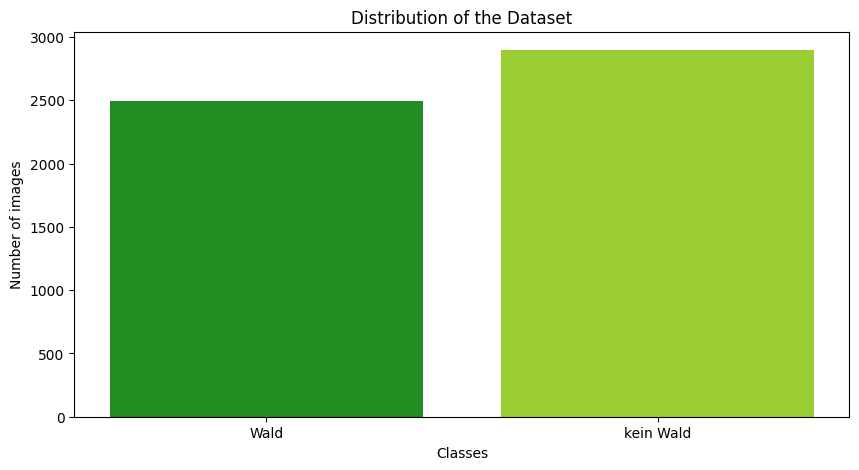

In [5]:
# read size of the dataset folders

print('total y images:', len(os.listdir('dataset/original_data/y')))
print('total n images:', len(os.listdir('dataset/original_data/n')))

# plot distribution of the dataset with matplotlib
plt.figure(figsize=(10, 5))
plt.bar(['Wald', 'kein Wald'], [len(os.listdir('dataset/original_data/y')), len(os.listdir('dataset/original_data/n'))],color = ['forestgreen', 'yellowgreen'])
plt.title('Distribution of the Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.savefig('Plots/dataset_distribution.png')
plt.show()



In [6]:
# calculates the number of images for train, validation and test
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# calculates the number of images for train, validation and test
train_y_size = int(len(os.listdir('dataset/original_data/y')) * train_size)
train_n_size = int(len(os.listdir('dataset/original_data/n')) * train_size)

validation_y_size = int(len(os.listdir('dataset/original_data/y')) * validation_size)
validation_n_size = int(len(os.listdir('dataset/original_data/n')) * validation_size)

test_y_size = int(len(os.listdir('dataset/original_data/y')) * test_size)
test_n_size = int(len(os.listdir('dataset/original_data/n')) * test_size)

train_y_size + validation_y_size + test_y_size

2496

In [7]:
rename = False
y_dir = 'dataset/original_data/y/'
n_dir = 'dataset/original_data/n/'
if rename == True:
    # change name of the images in the dataset folder

    i = 0
    for filename in os.listdir(y_dir):
        os.rename(y_dir + filename, y_dir + 'y.' + str(i) + '.jpg')
        i = i + 1

    y = 0
    for filename in os.listdir(n_dir):
        os.rename(n_dir + filename, n_dir + 'n.' + str(y) + '.jpg')
        y = y + 1
        

    # copy train_y_size images from the original dataset to the train_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(train_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy train_n_size images from the original dataset to the train_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(train_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_y_size images from the original dataset to the validation_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size, train_y_size + validation_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(validation_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy validation_n_size images from the original dataset to the validation_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size, train_n_size + validation_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(validation_n_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_y_size images from the original dataset to the test_y_dir
    fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size + validation_y_size, train_y_size + validation_y_size + test_y_size)]
    for fname in fnames:
        src = os.path.join(y_dir, fname)
        dst = os.path.join(test_y_dir, fname)
        shutil.copyfile(src, dst)

    # copy test_n_size images from the original dataset to the test_n_dir
    fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size + validation_n_size, train_n_size + validation_n_size + test_n_size)]
    for fname in fnames:
        src = os.path.join(n_dir, fname)
        dst = os.path.join(test_n_dir, fname)
        shutil.copyfile(src, dst)
    

## Control of the data

In [8]:
print('total training y images:', len(os.listdir(train_y_dir)))
print('total training n images:', len(os.listdir(train_n_dir)))
print('total validation y images:', len(os.listdir(validation_y_dir)))
print('total validation n images:', len(os.listdir(validation_n_dir)))
print('total test y images:', len(os.listdir(test_y_dir)))
print('total test n images:', len(os.listdir(test_n_dir)))

total training y images: 1498
total training n images: 1738
total validation y images: 499
total validation n images: 579
total test y images: 499
total test n images: 579


## Data Gathering with Generator


In [9]:
# without Data Augmentation

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.3,
                                                             height_shift_range=0.3,
                                                             shear_range=0.3,
                                                             zoom_range=0.3,
                                                             horizontal_flip=True,
                                                             fill_mode='nearest'
                                                             )

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (125, 125),
    batch_size = 16,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (125,125),
    batch_size = 16,
    class_mode = 'binary'
)

Found 3236 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


Look at the output of one of these generators.

In [10]:

for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break


data_batch shape: (16, 125, 125, 3)
labels batch shape (16,)


## Modeling
Nun sollen Sie ein Modell für diese Daten bauen.

### Base Model

In [11]:
early_stopping = EarlyStopping(monitor='acc', patience=10, verbose=1, mode='auto', restore_best_weights=True)

In [12]:
base_model = keras.models.Sequential()

# 1st Convolutional Layer
base_model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(125,125,3)))
base_model.add(keras.layers.Dropout(0.3))

# 2nd Convolutional Layer
base_model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
base_model.add(keras.layers.Dropout(0.3))
base_model.add(keras.layers.MaxPooling2D((2,2)))

# Dense Layer
base_model.add(tf.keras.layers.Flatten())
base_model.add(keras.layers.Dense(256, activation='relu'))

# Output Layer
base_model.add(keras.layers.Dense(1, activation='sigmoid'))
base_model.summary()



Model: "sequential"


2023-06-07 14:56:18.014310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 14:56:18.014343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      896       
                                                                 
 dropout (Dropout)           (None, 123, 123, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 121, 121, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (De

In [13]:
# Compile the model
base_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model
history = base_model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32
)


Epoch 1/30


2023-06-07 14:56:28.809194: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-07 14:56:29.125763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 7.0184 - acc: 0.6289

2023-06-07 14:56:58.260950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 57s 2s/step - loss: 7.0184 - acc: 0.6289 - val_loss: 0.6645 - val_acc: 0.6367
Epoch 2/30
32/32 [==============================] - 53s 2s/step - loss: 0.5269 - acc: 0.7720 - val_loss: 0.5666 - val_acc: 0.6152
Epoch 3/30
32/32 [==============================] - 52s 2s/step - loss: 0.5937 - acc: 0.7422 - val_loss: 0.5896 - val_acc: 0.6113
Epoch 4/30
32/32 [==============================] - 50s 2s/step - loss: 0.4201 - acc: 0.8220 - val_loss: 0.4705 - val_acc: 0.7227
Epoch 5/30
32/32 [==============================] - 51s 2s/step - loss: 0.6661 - acc: 0.7871 - val_loss: 0.5467 - val_acc: 0.6504
Epoch 6/30
32/32 [==============================] - 50s 2s/step - loss: 0.3673 - acc: 0.8418 - val_loss: 0.6812 - val_acc: 0.6152
Epoch 7/30
32/32 [==============================] - 49s 2s/step - loss: 0.4564 - acc: 0.8262 - val_loss: 0.4450 - val_acc: 0.8730
Epoch 8/30
32/32 [==============================] - 49s 2s/step - loss: 0.4241 - acc: 0.8379 - val_lo

<Figure size 640x480 with 0 Axes>

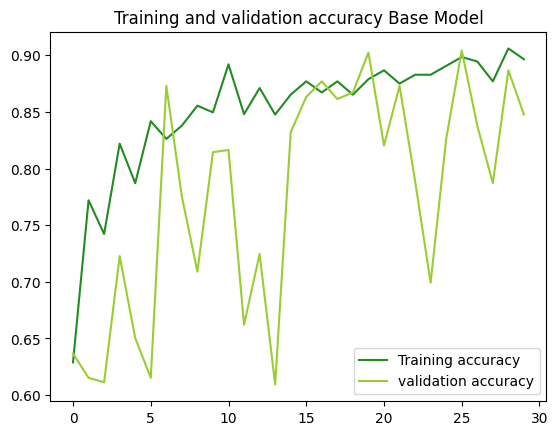

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot of the training and validation Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='forestgreen')
plt.plot(epochs, val_acc, label='validation accuracy', color='yellowgreen')
plt.title('Training and validation accuracy Base Model')
plt.legend(loc=0)
plt.savefig('Plots/Base_Model/BaseModel_Accuracy.png')
plt.figure()

# create a folder with Plots for the base model
#os.mkdir('Plots')
#os.mkdir('Plots/Base_Model')




### Test the model (on the test data)

In [21]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (125,125),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False)

test_loss, test_acc = base_model.evaluate(test_generator)
print('test acc:', test_acc)

Found 1078 images belonging to 2 classes.
34/34 [==============================] - 48s 1s/step - loss: 0.4116 - acc: 0.8312
test acc: 0.8311688303947449


#### Predictions with the base model

In [25]:
# make predictions
y_pred = base_model.predict(test_generator)
#y_pred

34/34 [==============================] - 49s 1s/step


In [26]:
y_pred = np.round(y_pred)

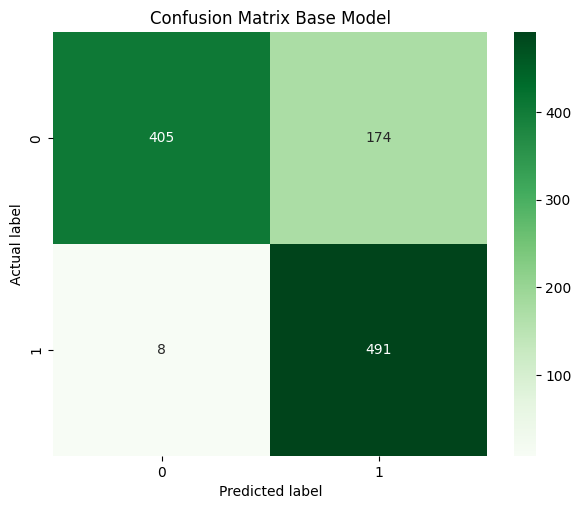

In [29]:
#plot confusion matrix for test data
cm = confusion_matrix(test_generator.classes, y_pred)

# plot the confusion matrix
plt.figure(figsize=(7,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.title('Confusion Matrix Base Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Plots/Base_Model/BaseModel_ConfusuinMatirx.png')
plt.show()


# Pretrained Model

In [30]:

# Load pre-trained VGG16 model without the top layers (include_top=False)
pr_model = VGG16(weights='imagenet', include_top=False, input_shape=(125, 125, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
pr_model.trainable = False

# Create a new model by adding your own classifier on top of the pre-trained base
model = keras.models.Sequential()
model.add(pr_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model
history1 = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32, callbacks=[early_stopping]
)




Epoch 1/30


2023-06-07 15:38:41.998288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.5246 - acc: 0.7440

2023-06-07 15:39:07.052087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 50s 2s/step - loss: 0.5246 - acc: 0.7440 - val_loss: 0.4495 - val_acc: 0.8047
Epoch 2/30
32/32 [==============================] - 48s 2s/step - loss: 0.4004 - acc: 0.8080 - val_loss: 0.3385 - val_acc: 0.8652
Epoch 3/30
32/32 [==============================] - 49s 2s/step - loss: 0.3486 - acc: 0.8516 - val_loss: 0.3030 - val_acc: 0.8750
Epoch 4/30
32/32 [==============================] - 48s 2s/step - loss: 0.3406 - acc: 0.8633 - val_loss: 0.2591 - val_acc: 0.8945
Epoch 5/30
32/32 [==============================] - 48s 2s/step - loss: 0.3083 - acc: 0.8711 - val_loss: 0.2945 - val_acc: 0.8594
Epoch 6/30
32/32 [==============================] - 48s 2s/step - loss: 0.3360 - acc: 0.8555 - val_loss: 0.3453 - val_acc: 0.8574
Epoch 7/30
32/32 [==============================] - 48s 2s/step - loss: 0.2894 - acc: 0.8820 - val_loss: 0.2883 - val_acc: 0.8926
Epoch 8/30
32/32 [==============================] - 48s 2s/step - loss: 0.3063 - acc: 0.8672 - val_lo

<Figure size 640x480 with 0 Axes>

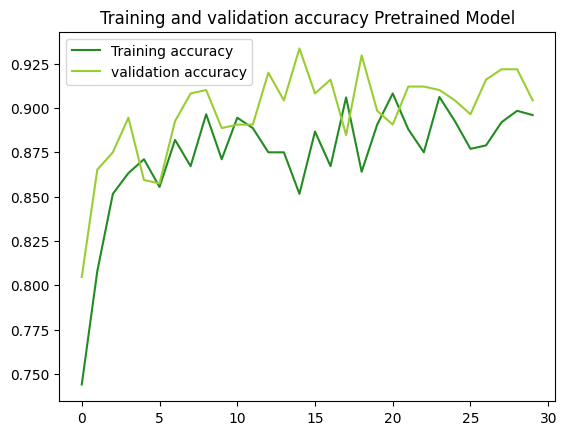

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot of the training and validation Accuracy

acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='forestgreen')
plt.plot(epochs, val_acc, label='validation accuracy', color='yellowgreen')
plt.title('Training and validation accuracy Pretrained Model')
plt.legend(loc=0)
plt.savefig('Plots/Pretrained_Model/Pretrained_Model_Accuracy.png')
plt.figure()

# create a folder with Plots for the base model
#os.mkdir('Plots')
#os.mkdir('Plots/Pretrained_Model')

In [32]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (125,125),
    batch_size = 768,
    class_mode = 'binary',
    shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 1078 images belonging to 2 classes.
2/2 [==============================] - 49s 13s/step - loss: 0.2490 - acc: 0.8933
test acc: 0.8933209776878357


In [33]:
# make predictions
y_pred = model.predict(test_generator)
y_pred = y_pred.round()

2023-06-07 16:08:04.377463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 48s 14s/step


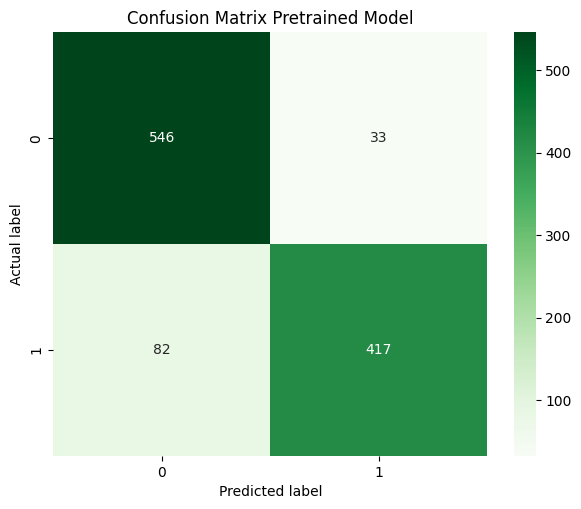

In [34]:
#plot confusion matrix for test data
cm = confusion_matrix(test_generator.classes, y_pred)

# plot the confusion matrix
plt.figure(figsize=(7,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.title('Confusion Matrix Pretrained Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Plots/Pretrained_Model/Pretrained_Model_Confusion_Matrix.png')
plt.show()

# save confusion matrix


# Optimized Pretrained Model

In [42]:

# Load pre-trained VGG16 model without the top layers (include_top=False)
pr_model = VGG16(weights='imagenet', include_top=False, input_shape=(125, 125, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
pr_model.trainable = False

# Create a new model by adding your own classifier on top of the pre-trained base
model = keras.models.Sequential()
model.add(pr_model)
model.add(keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



# Finetuning VGG16
pr_model.trainable = True

set_trainable = False
for layer in pr_model.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=['acc'])

# Train the model
history1 = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=32, callbacks=[early_stopping]
)




Epoch 1/30


2023-06-07 17:11:21.267342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.5555 - acc: 0.7480

2023-06-07 17:11:46.536979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 50s 2s/step - loss: 0.5555 - acc: 0.7480 - val_loss: 0.5110 - val_acc: 0.7129
Epoch 2/30
32/32 [==============================] - 48s 2s/step - loss: 0.4669 - acc: 0.8066 - val_loss: 0.4841 - val_acc: 0.8105
Epoch 3/30
32/32 [==============================] - 47s 1s/step - loss: 0.4174 - acc: 0.8460 - val_loss: 0.2211 - val_acc: 0.9180
Epoch 4/30
32/32 [==============================] - 47s 2s/step - loss: 0.3480 - acc: 0.8594 - val_loss: 0.2980 - val_acc: 0.8906
Epoch 5/30
32/32 [==============================] - 48s 2s/step - loss: 0.3595 - acc: 0.8516 - val_loss: 0.4315 - val_acc: 0.8145
Epoch 6/30
32/32 [==============================] - 47s 1s/step - loss: 0.2901 - acc: 0.8828 - val_loss: 0.3480 - val_acc: 0.8867
Epoch 7/30
32/32 [==============================] - 48s 2s/step - loss: 0.3568 - acc: 0.8574 - val_loss: 0.5426 - val_acc: 0.8320
Epoch 8/30
32/32 [==============================] - 48s 2s/step - loss: 0.3191 - acc: 0.8633 - val_lo

<Figure size 640x480 with 0 Axes>

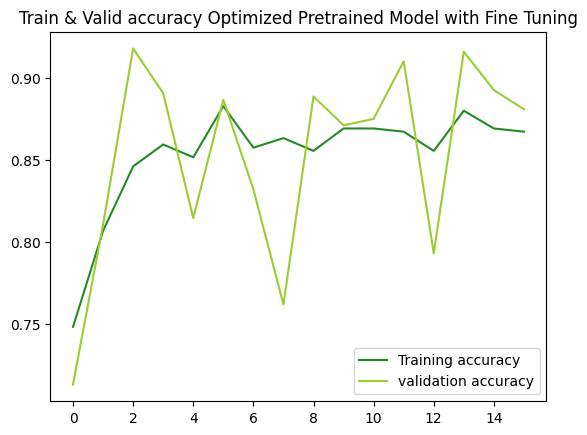

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot of the training and validation Accuracy

acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='forestgreen')
plt.plot(epochs, val_acc, label='validation accuracy', color='yellowgreen')
plt.title('Train & Valid accuracy Optimized Pretrained Model with Fine Tuning')
plt.legend(loc=0)
plt.savefig('Plots/Pretrained_Model/Optimized_Pretrained_Model_Accuracy_FineTuned.png')
plt.figure()

# create a folder with Plots for the base model
#os.mkdir('Plots')
#os.mkdir('Plots/Pretrained_Model')

In [45]:

#save model
model.save('Models/Pretrained_Model/Optimized_Pretrained_Model_FineTuned.h5')

In [46]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (125,125),
    batch_size = 768,
    class_mode = 'binary',
    shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 1078 images belonging to 2 classes.
2/2 [==============================] - 50s 13s/step - loss: 0.4237 - acc: 0.8803
test acc: 0.8803339600563049


In [47]:
# make predictions
y_pred = model.predict(test_generator)
y_pred = y_pred.round()

2023-06-07 17:30:32.075517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 48s 14s/step


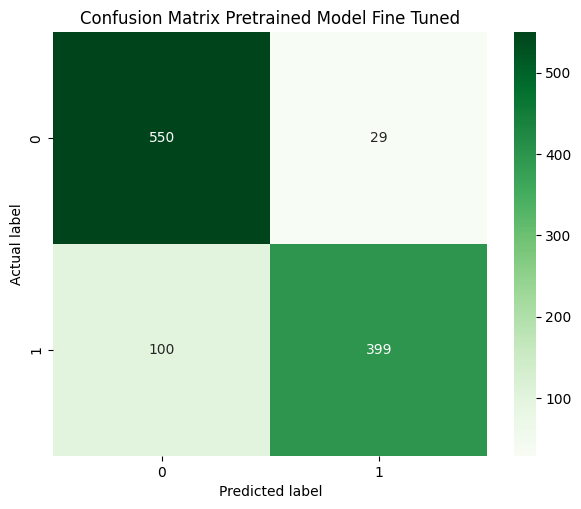

In [48]:
#plot confusion matrix for test data
cm = confusion_matrix(test_generator.classes, y_pred)

# plot the confusion matrix
plt.figure(figsize=(7,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.title('Confusion Matrix Pretrained Model Fine Tuned')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Plots/Pretrained_Model/Pretrained_Model_Confusion_Matrix_FineTuned.png')
plt.show()
